In [267]:
import pandas as pd 
import matplotlib.pyplot as plt
#from sklearn import datasets, linear_model
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from sklearn.linear_model import Ridge
import numpy as np
data =pd.read_csv("train-Copy1.csv")
print(data.shape)
data.head()
print(data.description.unique().shape[0])
data.head()

(304, 9)
304


,id,name,description,image,location,stage,industry,subindustry,website
0,0,ABOVE POTENTIAL,"Accountability Coach for entrepreneurs, creati...",https://res.cloudinary.com/sblink/w_64/f5ttbnh...,"London, United Kingdom",Idea/MVP/Beta,Social & Leisure,Communities,https://www.abovepotential.com/
1,4,Rover,"Whether you need in-home dog boarding, pet sit...",https://res.cloudinary.com/crunchbase-producti...,"London, United Kingdom",Idea/MVP/Beta,Software and Data,Apps,https://www.rover.com/uk/
2,5,MillTechFX by Millennium Global,MillTechFX by Millennium Global is the FinTech...,https://res.cloudinary.com/sblink/w_64/dxgtijd...,"London, United Kingdom",Idea/MVP/Beta,Fintech,Financial Services,https://milltechfx.com/
3,6,RankedRight,RankedRight is the triage tool that automatica...,https://res.cloudinary.com/sblink/w_64/6c7f799...,"London, United Kingdom",Idea/MVP/Beta,Software and Data,Cybersecurity,https://www.rankedright.com
4,8,IG Group,"IG empowers informed, decisive, adventurous pe...",https://res.cloudinary.com/crunchbase-producti...,"London, United Kingdom",Generating Revenues and Scaling,Fintech,Fintech-Other,https://www.iggroup.com/


In [268]:
data[data.stage=='No information'].values.shape[0]
print(data.name.unique().shape[0])
data=data.drop(columns=['stage','image','description','website','name'])
industry_unique=data.industry.unique()
dicts = {}
keys = range(len(industry_unique))
for i in keys:
    for x in industry_unique:
        dicts[i] = industry_unique[i]
ind_inv_map = {v: k for k, v in dicts.items()}
print(ind_inv_map)

304
{'Social & Leisure': 0, 'Software and Data': 1, 'Fintech': 2, 'Education': 3, 'Ecommerce & Retail': 4, 'Hardware & IoT': 5, 'Health': 6, 'Marketing & Sales': 7, 'Transportation': 8, 'Energy & Environment': 9, 'Foodtech': 10}


In [269]:
subindustry_unique=data.subindustry.unique()
dictsSub = {}
keysSub = range(len(subindustry_unique))
for i in keysSub:
    for x in subindustry_unique:
        dictsSub[i] = subindustry_unique[i]
sub_inv_map = {v: k for k, v in dictsSub.items()}
print(sub_inv_map)

{'Communities': 0, 'Apps': 1, 'Financial Services': 2, 'Cybersecurity': 3, 'Fintech-Other': 4, 'SaaS': 5, 'Data Analytics': 6, 'Edtech': 7, 'Social Media': 8, 'Software': 9, 'Enterprise Technology': 10, 'Ecommerce': 11, 'Entertainment': 12, 'Manufacturing': 13, 'Web Development': 14, 'Online Banking': 15, 'Artificial Intelligence': 16, 'Arts': 17, '3D Printing': 18, 'Hardware & IoT-Other': 19, 'Social & Leisure-Other': 20, 'Health Care': 21, 'Adtech': 22, 'Education-Other': 23, 'Cryptocurrency': 24, 'Cloud': 25, 'VR/AR': 26, 'Automotive': 27, 'Energy & Environment-Other': 28, 'Clean Energy': 29, 'Software and Data-Other': 30, 'Logistics': 31, 'Hardware': 32, 'Travel': 33, 'CRM': 34, 'Agtech': 35, 'Aerospace': 36, 'Blockchain': 37, 'Ecommerce & Retail-Other': 38, 'Health-Other': 39, 'Content Marketing': 40, 'Marketplaces': 41, 'Digital Media': 42, 'Fitness': 43, 'Energy': 44, 'Digital Marketing': 45, 'Consumer Electronics': 46, 'Biotechnology': 47, 'Investment': 48, 'Food and Beverage':

In [270]:
data=data.applymap(lambda s: ind_inv_map.get(s) if s in ind_inv_map else s)
data=data.applymap(lambda s: sub_inv_map.get(s) if s in sub_inv_map else s)
data.head()

,id,location,industry,subindustry
0,0,"London, United Kingdom",0,0
1,4,"London, United Kingdom",1,1
2,5,"London, United Kingdom",2,2
3,6,"London, United Kingdom",1,3
4,8,"London, United Kingdom",2,4


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


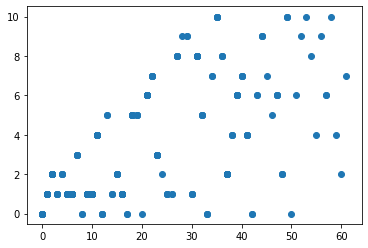

In [271]:
X=data['subindustry'].values
y=data['industry'].values

print(type(X),type(y))
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)
#print('x:',X)
#print('y:',y)
plt.scatter(X,Y)
plt.show()

In [272]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
# Create the regressor: reg_all
#reg_all = LinearRegression()
# Fit the regressor to the training data
#reg_all.fit(X_train,y_train)
# Predict on the test data: y_pred
#y_pred = reg_all.predict(X_test)
# Compute and print R^2 and RMSE
#print("R^2: {}".format(reg_all.score(X_test, y_test)))
#rmse = np.sqrt(mean_squared_error(y_test,y_pred))
#print("Root Mean Squared Error: {}".format(rmse))


In [273]:
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.44516898473838673

In [284]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 20).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test) 
# creating a confusion matrix
print(dtree_predictions.shape[0])
print((y_test.shape[0]))
cm = confusion_matrix(y_test, dtree_predictions)
print(classification_report(y_test, dtree_predictions))

76
76
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00         7
           3       0.60      1.00      0.75         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         5
           6       1.00      0.90      0.95        10
           7       1.00      1.00      1.00         3
           8       1.00      0.83      0.91         6
           9       0.50      1.00      0.67         2
          10       0.00      0.00      0.00         0

    accuracy                           0.92        76
   macro avg       0.83      0.80      0.79        76
weighted avg       0.97      0.92      0.93        76



C:\Users\Hassan Mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [286]:
t_data =pd.read_csv("test-Copy1.csv")
t_data=t_data.filter(['id', 'subindustry'])
ids =t_data['id']
t_data=t_data.applymap(lambda s: sub_inv_map.get(s) if s in sub_inv_map else 1)
Xt=t_data['subindustry'].values
Xt = Xt.reshape(-1, 1)
t_dtree_predictions = dtree_model.predict(Xt) 
t_data['industry']=t_dtree_predictions
t_data=t_data.applymap(lambda s: dicts.get(s) if s in dicts else s)
t_data['id']=ids
t_data=t_data.drop(columns='subindustry')
print(t_data.head())
t_data.to_csv('test_data_last',index=False)

   id            industry
0   1  Ecommerce & Retail
1   2   Software and Data
2   3   Software and Data
3   7  Ecommerce & Retail
4  13      Transportation


In [276]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state = 0)
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
print(classification_report(y_test, svm_predictions))

0.4673913043478261
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.66      0.97      0.79        40
           2       0.15      0.50      0.23         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         0

    accuracy                           0.47        92
   macro avg       0.07      0.13      0.09        92
weighted avg       0.30      0.47      0.36        92



C:\Users\Hassan Mustafa\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hassan Mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hassan Mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print (accuracy)
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
print(classification_report(y_test, gnb_predictions))

C:\Users\Hassan Mustafa\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4868421052631579
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.65      0.94      0.77        32
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         5
           6       0.40      0.40      0.40        10
           7       0.00      0.00      0.00         3
           8       0.60      0.50      0.55         6
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         0

    accuracy                           0.49        76
   macro avg       0.15      0.17      0.16        76
weighted avg       0.37      0.49      0.42        76



C:\Users\Hassan Mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hassan Mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [278]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train)
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print (accuracy)
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)
print(classification_report(y_test, knn_predictions))

C:\Users\Hassan Mustafa\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.618421052631579
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.87      0.84      0.86        32
           2       0.47      1.00      0.64         7
           3       0.33      0.33      0.33         3
           4       0.33      0.67      0.44         3
           5       0.80      0.80      0.80         5
           6       0.50      0.20      0.29        10
           7       0.00      0.00      0.00         3
           8       0.75      0.50      0.60         6
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         0

    accuracy                           0.62        76
   macro avg       0.46      0.41      0.39        76
weighted avg       0.68      0.62      0.61        76



C:\Users\Hassan Mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hassan Mustafa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [279]:
sample =pd.read_csv("sample-Copy1.csv")
sample

,id,industry
0,0,Social & Leisure
1,4,Software and Data
2,5,Fintech
3,6,Software and Data
4,8,Fintech
5,9,Software and Data
6,10,Software and Data
7,11,Education
8,12,Social & Leisure
9,14,Fintech
